In [93]:
# Third-party
import astropy.coordinates as coord
import astropy.units as u
from astropy.table import Table, Column
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from scipy.interpolate import InterpolatedUnivariateSpline

import gala.coordinates as gc
import gala.dynamics as gd
import gala.potential as gp
from gala.units import galactic
from pyia import GaiaData

In [11]:
g = GaiaData('../data/data-joined.fits')
g = g[g.pm_prob > 0.2]

In [53]:
bprp = g.phot_bp_mean_mag - g.phot_rp_mean_mag
bp = g.phot_bp_mean_mag
Gmag = g.phot_g_mean_mag

gmag = g.ps1_g_mean_psf_mag

In [38]:
cmd_mask = ((bprp < 0.08*u.mag) & (bprp > -0.3*u.mag) &
            (Gmag < 19.8*u.mag))
cmd_mask.sum()

71

Text(0,0.5,'g')

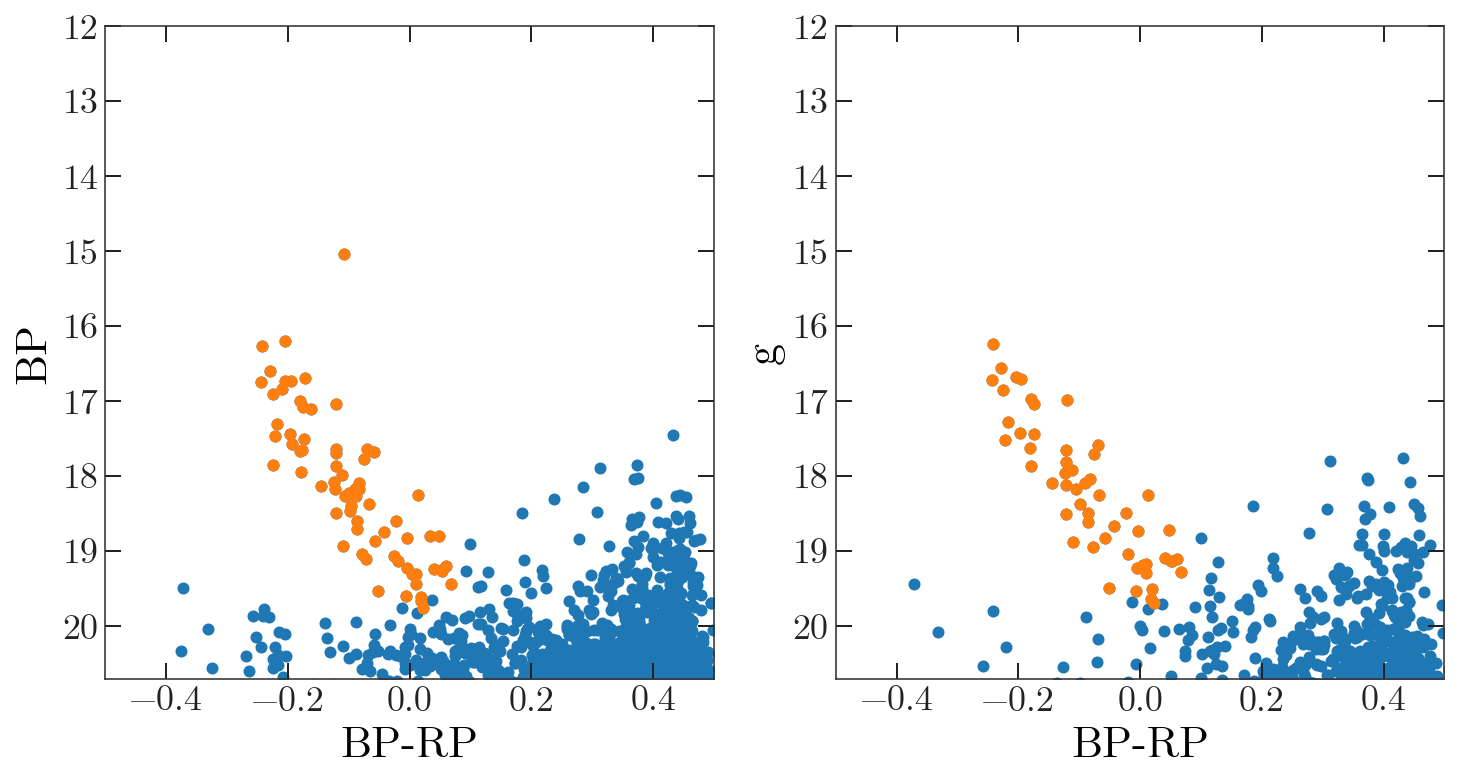

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True)

ax = axes[0]
ax.scatter(bprp, bp)
ax.scatter(bprp[cmd_mask], bp[cmd_mask], color='tab:orange')
ax.set_xlim(-0.5, 0.5)
ax.set_ylim(20.7, 12)

ax.set_xlabel('BP-RP')
ax.set_ylabel('BP')

ax = axes[1]
ax.scatter(bprp, gmag)
ax.scatter(bprp[cmd_mask], gmag[cmd_mask], color='tab:orange')
ax.set_xlim(-0.5, 0.5)
ax.set_ylim(20.7, 12)

ax.set_xlabel('BP-RP')
ax.set_ylabel('g')

In [69]:
def get_exptime(g):
    spl = InterpolatedUnivariateSpline([16,17,18,19], 
                                       np.log([180, 3*180, 3*500, 3*1200]))
    return np.exp(spl(g))

In [70]:
(10*u.hour).to(u.second)

<Quantity 36000. s>

In [73]:
mag_sort_idx = bp[cmd_mask].argsort()
get_exptime(bp[cmd_mask][mag_sort_idx][:30]).sum() / 60 / 60

6.439762965353064

In [89]:
targets = g.data[cmd_mask][mag_sort_idx]
targets['exptime'] = get_exptime(targets['phot_bp_mean_mag']).astype(int)

In [104]:
targets_tbl = targets['ra', 'dec', 'phot_bp_mean_mag', 'exptime']
targets_tbl.rename_column('phot_bp_mean_mag', 'gaia_BP')

col = Column(data=['PW1-{:02d}'.format(i) for i in range(len(targets_tbl))],
             name='name')
targets_tbl.add_column(col, index=0)

targets_tbl['ra2'] = coord.Angle(targets_tbl['ra']*u.deg).to_string(unit=u.hourangle, sep=':')
targets_tbl['dec2'] = coord.Angle(targets_tbl['dec']*u.deg).to_string(unit=u.degree, sep=':')

In [105]:
targets_tbl.write('../output/MIKE_targets.fits', overwrite=True)
targets_tbl.write('../output/MIKE_targets.csv', overwrite=True)

In [106]:
targets_tbl

name,ra,dec,gaia_BP,exptime,ra2,dec2
str6,float64,float64,float32,int64,str13,str14
PW1-00,178.88317778515932,-33.15625456632514,15.0297985,61,11:55:31.9627,-33:09:22.5164
PW1-01,179.00182010132494,-29.483362916885003,16.193611,223,11:56:00.4368,-29:29:00.1065
PW1-02,179.07677448325438,-29.32545290904592,16.261358,240,11:56:18.4259,-29:19:31.6305
PW1-03,179.05047469778555,-29.531938811406437,16.595549,348,11:56:12.1139,-29:31:54.9797
PW1-04,180.0485308555998,-28.00034846660283,16.692678,387,12:00:11.6474,-28:00:01.2545
PW1-05,179.33739839258303,-29.465417867476724,16.727686,402,11:57:20.9756,-29:27:55.5043
PW1-06,179.23472828055185,-29.42217142049804,16.732075,404,11:56:56.3348,-29:25:19.8171
PW1-07,178.94381461736015,-29.568050148655715,16.741814,408,11:55:46.5155,-29:34:04.9805
PW1-08,179.02061045371417,-28.479645384997244,16.83953,454,11:56:04.9465,-28:28:46.7234
